d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Applied Decision Trees Lab

**Objective**: *Apply decision trees to a regression problem in an effort to represent more complex relationships without overfitting.*

In this lab you will apply what you've learned about decision trees and overfitting. When complete, please use your answers to the exercises to answer questions in the following quiz within Coursera.

In [0]:
%run ../../Includes/Classroom-Setup

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[53]: DataFrame[]

res9: Boolean = false

res10: Boolean = false

res11: Boolean = false

-sandbox
## Exercise 1

In this exercise, you will create a user-level table with the following columns:

1. `avg_resting_heartrate` – the average resting heartrate
1. `avg_active_heartrate` - the average active heartrate
1. `avg_bmi` – the average BMI
1. `avg_vo2` - the average oxygen volume
1. `avg_workout_minutes` - the average of total workout minutes
1. `avg_steps` - the average of total steps

Fill in the blanks in the below code block to aggregate the metrics by `device_id`.

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** Refer back to previous demos and labs for guidance on creating a table.

In [0]:
%sql
-- TODO
CREATE OR REPLACE TABLE adsda.ht_daily_metrics_agg
USING DELTA LOCATION "/adsda/ht-daily-metrics-agg" AS (
  SELECT device_id,
         avg(resting_heartrate) AS avg_resting_heartrate,
         avg(active_heartrate) AS avg_active_heartrate,
         avg(bmi) AS bmi,
         avg(vo2) AS avg_vo2,
         avg(workout_minutes) AS avg_workout_minutes,
         avg(steps) AS steps
  FROM adsda.ht_daily_metrics
  GROUP BY device_id
)

num_affected_rows,num_inserted_rows


**Coursera Quiz:** How many distinct values of `device_id` are in the aggregated table?

Write your code in the below empty cell to answer the question.

In [0]:
%sql
SELECT  COUNT(DISTINCT device_id)
FROM adsda.ht_daily_metrics_agg

count(DISTINCT device_id)
3000


Fill in the following cell to create a Pandas DataFrame from the Spark table.

In [0]:
# TODO
ht_metrics_pd_df = spark.table('adsda.ht_daily_metrics_agg').toPandas()

Separate the DataFrame into the features (X) and the target (y). In this case, we want to predict a user's average workout minutes, using only the numeric features as predictors.

In [0]:
# TODO
X = ht_metrics_pd_df[['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'steps', 'avg_vo2']]
y = ht_metrics_pd_df["avg_workout_minutes"]

Perform a train-test split. Set a random state seed to 42 so that you will obtain consistent results.

In [0]:
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Coursera Quiz:** How many rows are in the training and test sets?

In [0]:
X_train.shape, X_test.shape

Out[62]: ((2250, 5), (750, 5))

## Exercise 2 

In this exercise, you will fit and train a base decision tree regression model.

For this first model, use the default hyperparameters.

Fill in the blanks of the below code block.

In [0]:
# TODO
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

Out[63]: DecisionTreeRegressor(random_state=42)

**Coursera Quiz:** What is the R-squared on the training set and on the test set?

In [0]:
# TODO
y_train_predicted = dt.predict(X_train)
y_test_predicted = dt.predict(X_test)

print("R2 on training set: ", round(dt.score(X_train, y_train),3))
print("R2 on test set: ", round(dt.score(X_test, y_test), 3))

R2 on training set:  1.0
R2 on test set:  0.989


Congratulations, you built a decision tree that does and excellent job predicting a user's average workout minutes, on both training and test sets! No overfitting or high variance here. There must be a particular feature or features that are highly correlated with the target.

Now let's see how a decision tree regression model will perform with a new target: a user's average `vo2`.

In [0]:
# TODO
X = ht_metrics_pd_df[['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'steps', 'avg_workout_minutes']]
y = ht_metrics_pd_df["avg_vo2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

y_train_predicted = dt.predict(X_train)
y_test_predicted = dt.predict(X_test)

print("R2 on training set: ", round(dt.score(X_train, y_train)))
print("R2 on test set: ", round(dt.score(X_test, y_test)))

R2 on training set:  1
R2 on test set:  1


Looks like we now have a model that is overfitting to the training set, as the test set accuracy is much lower.

## Exercise 3 

In this exercise, you will try some hyperparameter tuning to prune the tree and prevent it from overfitting, thus decreasing the variance and improving performance on the test set.

Build three decision tree models with three different `max_depth` options: 3, 5, and 9. Then compare which one performs the best. Remember to set the `random_state` to 42.

In [0]:
# TODO
dt_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_depth_3.fit(X_train, y_train)

y_train_predicted = dt_depth_3.predict(X_train)
y_test_predicted = dt_depth_3.predict(X_test)

print("R2 on training set: ", round(dt_depth_3.score(X_train, y_train),3))
print("R2 on test set: ", round(dt_depth_3.score(X_test, y_test), 3))

R2 on training set:  0.913
R2 on test set:  0.909


In [0]:
# TODO
dt_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_depth_5.fit(X_train, y_train)

y_train_predicted = dt_depth_5.predict(X_train)
y_test_predicted = dt_depth_5.predict(X_test)


print("R2 on training set: ", round(dt_depth_5.score(X_train, y_train),3))
print("R2 on test set: ", round(dt_depth_5.score(X_test, y_test), 3))

R2 on training set:  0.947
R2 on test set:  0.937


In [0]:
# TODO
dt_depth_9 = DecisionTreeRegressor(max_depth=9, random_state=42)
dt_depth_9.fit(X_train, y_train)

y_train_predicted = dt_depth_9.predict(X_train)
y_test_predicted = dt_depth_9.predict(X_test)

print("R2 on training set: ", round(dt_depth_9.score(X_train, y_train),3))
print("R2 on test set: ", round(dt_depth_9.score(X_test, y_test), 3))

R2 on training set:  0.974
R2 on test set:  0.926


**Coursera Quiz:** Which value for `max_depth` gives the best R-squared score on the test set, and what is the score?

## Exercise 4

In this exercise, you will practice visualizing the decision tree.

Since decision trees are a highly transparent model, we can actually visualize the decisions and splits it made at each step. 

Run the following cell to create a visualization of the decision tree with `max_depth` of 3.

Out[72]: [Text(0.5, 0.875, 'avg_resting_heartrate <= 63.596\nsquared_error = 49.633\nsamples = 2250\nvalue = 32.23'),
 Text(0.25, 0.625, 'avg_resting_heartrate <= 51.16\nsquared_error = 16.988\nsamples = 1486\nvalue = 36.336'),
 Text(0.125, 0.375, 'avg_resting_heartrate <= 49.522\nsquared_error = 8.11\nsamples = 401\nvalue = 41.323'),
 Text(0.0625, 0.125, 'squared_error = 6.228\nsamples = 160\nvalue = 43.665'),
 Text(0.1875, 0.125, 'squared_error = 3.299\nsamples = 241\nvalue = 39.768'),
 Text(0.375, 0.375, 'bmi <= 24.096\nsquared_error = 7.68\nsamples = 1085\nvalue = 34.492'),
 Text(0.3125, 0.125, 'squared_error = 6.111\nsamples = 687\nvalue = 35.769'),
 Text(0.4375, 0.125, 'squared_error = 2.717\nsamples = 398\nvalue = 32.288'),
 Text(0.75, 0.625, 'avg_resting_heartrate <= 78.308\nsquared_error = 16.577\nsamples = 764\nvalue = 24.245'),
 Text(0.625, 0.375, 'avg_resting_heartrate <= 72.767\nsquared_error = 5.977\nsamples = 408\nvalue = 27.141'),
 Text(0.5625, 0.125, 'squared_error = 3

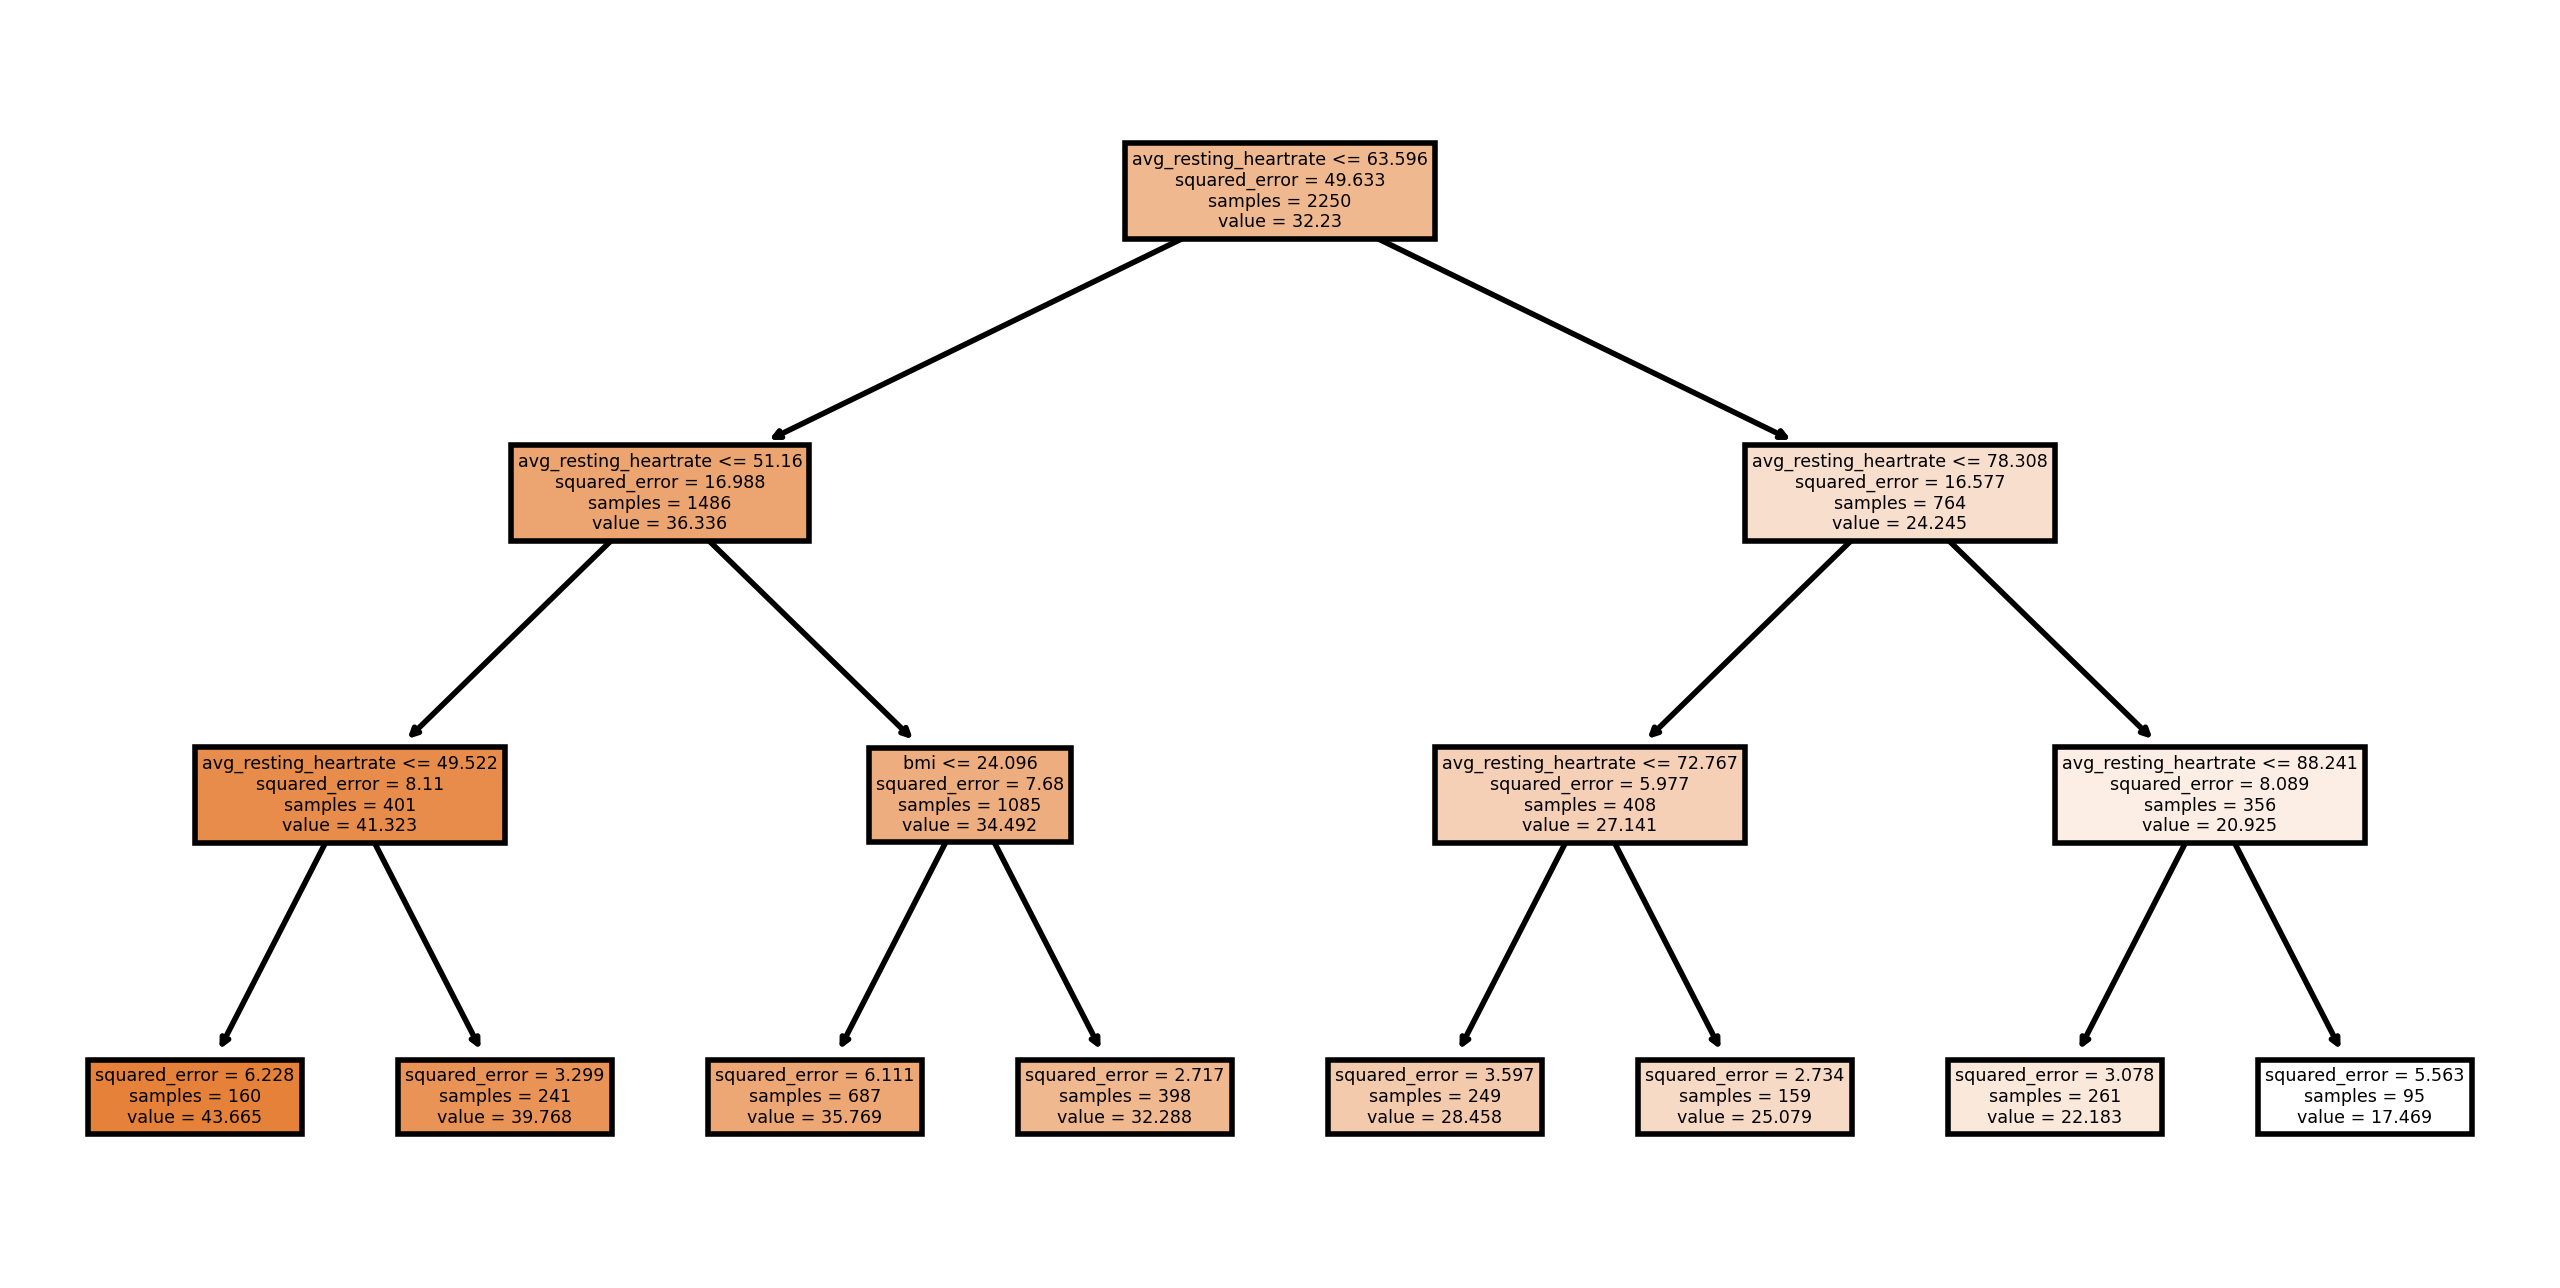

In [0]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (8, 4), dpi=400)

tree.plot_tree(
  dt_depth_3,
  feature_names = ['avg_resting_heartrate', 'avg_active_heartrate', 'bmi', 'steps', 'avg_workout_minutes'],
  filled = True
)

**Coursera Quiz:** Which feature did the decision tree choose for most of the splits?

**Coursera Quiz:** How many samples are in the terminal node at the far left?

-sandbox
**Coursera Quiz:** What value would the decision tree predict for `avg_vo2` if the `avg_resting_heartrate` is 60 and bmi is 22? 

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** If a data point meets the criteria in the top row of each node, i.e. a "yes", follow the tree down to the left; if not, follow the tree down to the right.

-sandbox
&copy; 2021 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>